# Introduction

In [1]:
# Tell jupyter that we want our graphs to appear within the notebook
%matplotlib inline 

# import tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

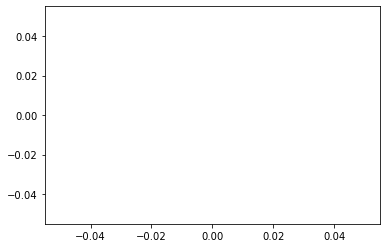

In [3]:
# create a plot(figure)
plt.plot();

# adding the semicolon tells plt not to display this output "[]"

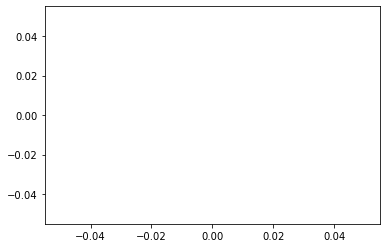

In [4]:
# if you don't want to use the semicolon, you can use show()
plt.plot()
plt.show()

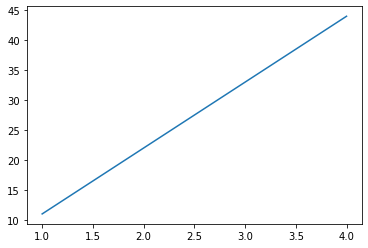

In [7]:
# plot some data

x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

plt.plot(x,y);

In [11]:
# METHOD 1

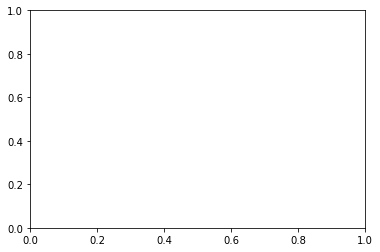

In [9]:
# plt.plot(); is the same as

fig = plt.figure() # create a figure
ax = fig.add_subplot() # add some axes
plt.show()

In [10]:
# METHOD 2

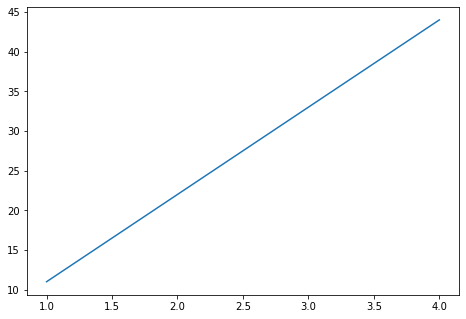

In [13]:
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x,y)
plt.show()

In [14]:
# METHOD 3 (Recommended)

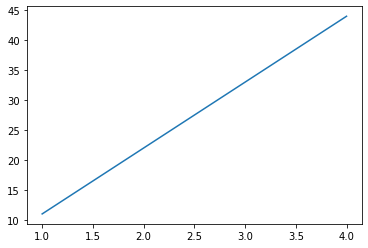

In [16]:
fig, ax = plt.subplots()
ax.plot(x,y);

# Anatomy

![Anatomy pic](anatomy.png)

# Matplotlib example workflow

![workflow pic](workflow.png)

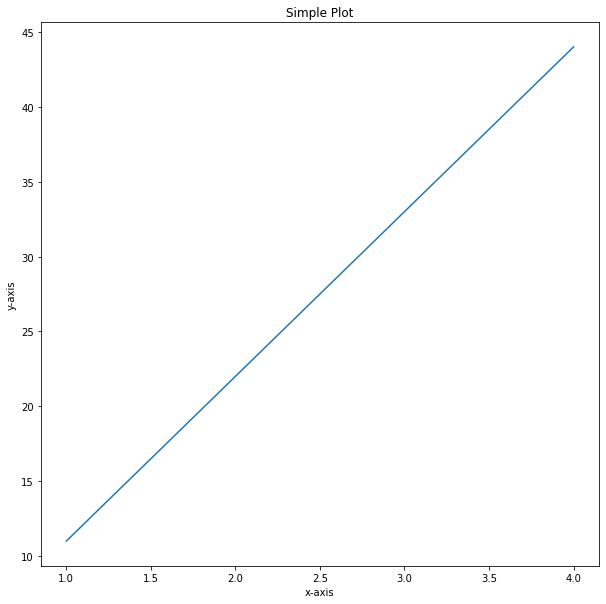

In [1]:
# 0. import matplotlib and get it ready for plotting in jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10)) # (width, height)

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Simple Plot",
      xlabel="x-axis",
      ylabel="y-axis")

# 5. Save & show the whole figure
fig.savefig("sample-plot.png")

# Types of Plots

- Line plote
- Scatter plot
- Bar plot
- Histogram
- Subplot

### Line plot


In [4]:
a1 = np.linspace(start=0, stop=10, num=100)
a1[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

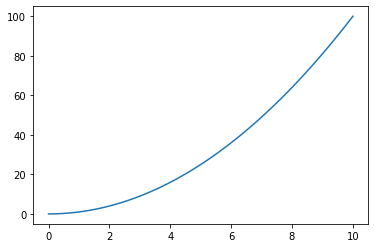

In [15]:
fig, ax = plt.subplots()
ax.plot(a1, a1**2);

### Scatter plot

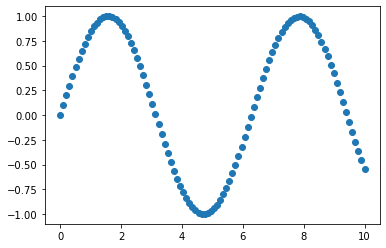

In [12]:
fig, ax = plt.subplots()
ax.scatter(x=a1, y=np.sin(a1));

### Bar plot

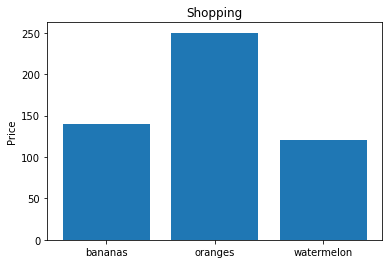

In [27]:
prices_dict = {
    "bananas": 140,
    "oranges": 250,
    "watermelon": 120
}

fig, ax = plt.subplots()
ax.bar(prices_dict.keys(), prices_dict.values())
ax.set(title="Shopping", ylabel="Price");

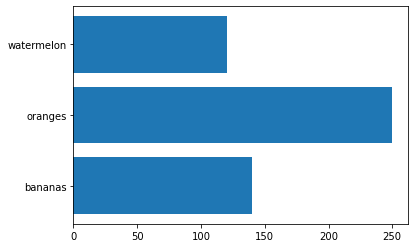

In [28]:
fig, ax = plt.subplots()
ax.barh(list(prices_dict.keys()), list(prices_dict.values()));


### Histogram

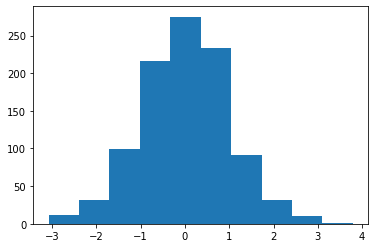

In [29]:
a2 = np.random.randn(1000) # normal distribution sample
fig, ax = plt.subplots()
ax.hist(a2);

## Creating multiple plots

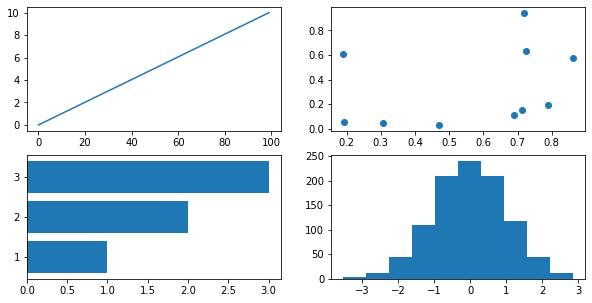

In [36]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                            ncols=2,
                                            figsize=(10,5))
# line 
ax1.plot(a1)

# scatter
ax2.scatter(np.random.random(10), np.random.random(10))

# bar
ax3.barh([1,2,3], [1,2,3])

# histogram
ax4.hist(np.random.randn(1000));

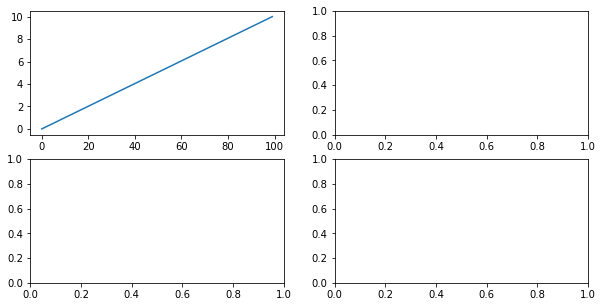

In [5]:
# Alternative method of creating subplots

fig, ax = plt.subplots(nrows=2,
                      ncols=2,
                      figsize=(10,5))

ax[0,0].plot(a1);

# Plotting from pandas DataFrames

In [19]:
df = pd.read_csv("car-sales.csv")
df

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [20]:
df["Price"] = df["Price"].str.replace("[\$\,\.]", "", regex=True)
df["Price"] = pd.to_numeric(df["Price"].str[:-2]) 
df

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [21]:
df.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [22]:
df["Sale Date"] = pd.date_range("1/1/2022", periods=len(df))
df

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2022-01-01
1,Honda,Red,87899,4,5000,2022-01-02
2,Toyota,Blue,32549,3,7000,2022-01-03
3,BMW,Black,11179,5,22000,2022-01-04
4,Nissan,White,213095,4,3500,2022-01-05
5,Toyota,Green,99213,4,4500,2022-01-06
6,Honda,Blue,45698,4,7500,2022-01-07
7,Honda,Blue,54738,4,7000,2022-01-08
8,Toyota,White,60000,4,6250,2022-01-09
9,Nissan,White,31600,4,9700,2022-01-10


In [25]:
df["Total Sales"] = df["Price"].cumsum()
df

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2022-01-01,4000
1,Honda,Red,87899,4,5000,2022-01-02,9000
2,Toyota,Blue,32549,3,7000,2022-01-03,16000
3,BMW,Black,11179,5,22000,2022-01-04,38000
4,Nissan,White,213095,4,3500,2022-01-05,41500
5,Toyota,Green,99213,4,4500,2022-01-06,46000
6,Honda,Blue,45698,4,7500,2022-01-07,53500
7,Honda,Blue,54738,4,7000,2022-01-08,60500
8,Toyota,White,60000,4,6250,2022-01-09,66750
9,Nissan,White,31600,4,9700,2022-01-10,76450


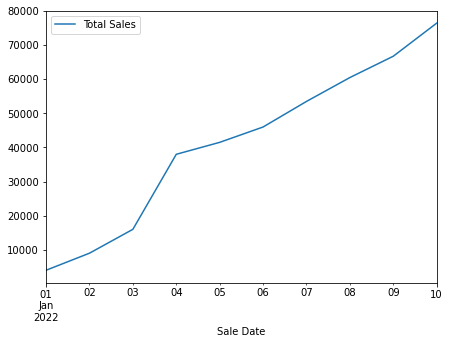

In [28]:
df.plot(x="Sale Date", y="Total Sales", figsize=(7,5));

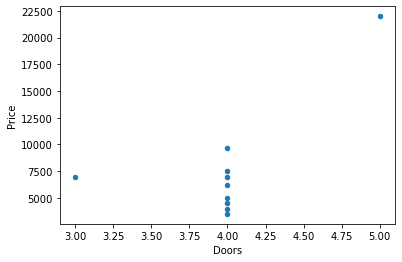

In [30]:
df.plot(x="Doors", y="Price", kind="scatter");

In [33]:
a1 = np.random.rand(10,4) # populate random values between 0-1 in a specified shape
a1

array([[0.63680369, 0.19509832, 0.87174617, 0.62006325],
       [0.6860069 , 0.98970794, 0.6055287 , 0.76116582],
       [0.88378599, 0.94615989, 0.82588552, 0.42167118],
       [0.87369732, 0.94790943, 0.16393055, 0.3104882 ],
       [0.63138698, 0.85575366, 0.86704155, 0.36469791],
       [0.39238743, 0.77493761, 0.28038942, 0.13573705],
       [0.65574435, 0.95486974, 0.12909416, 0.98288125],
       [0.39681044, 0.08440152, 0.02736065, 0.91397458],
       [0.11650622, 0.92763157, 0.57797896, 0.12871135],
       [0.75670066, 0.29135557, 0.61630844, 0.00195027]])

In [34]:
a1_df = pd.DataFrame(a1, columns=['a', "b", "c", "d"])
a1_df

,a,b,c,d
0,0.636804,0.195098,0.871746,0.620063
1,0.686007,0.989708,0.605529,0.761166
2,0.883786,0.946160,0.825886,0.421671
3,0.873697,0.947909,0.163931,0.310488
4,0.631387,0.855754,0.867042,0.364698
5,0.392387,0.774938,0.280389,0.135737
6,0.655744,0.954870,0.129094,0.982881
7,0.396810,0.084402,0.027361,0.913975
8,0.116506,0.927632,0.577979,0.128711
9,0.756701,0.291356,0.616308,0.001950


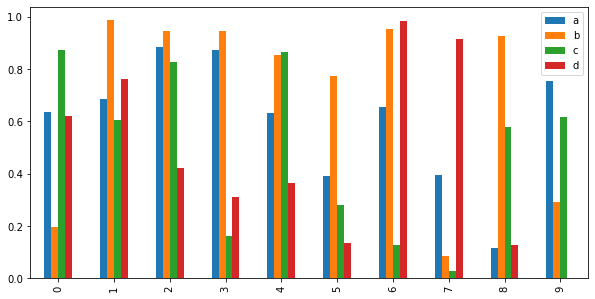

In [36]:
a1_df.plot.bar(figsize=(10,5));

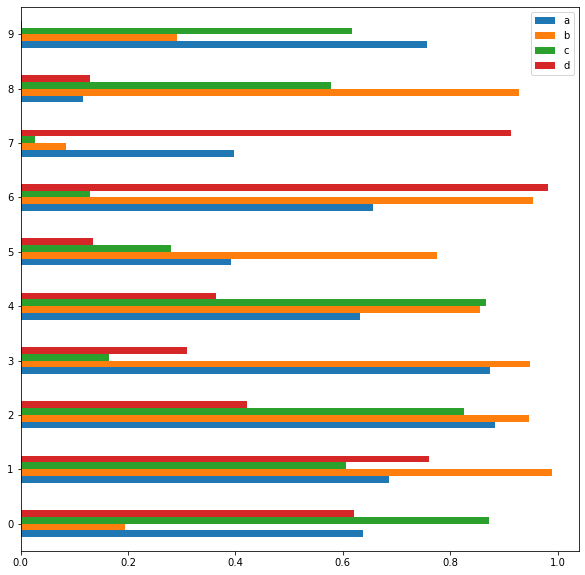

In [42]:
a1_df.plot(kind="barh", figsize=(10,10));

In [43]:
df

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2022-01-01,4000
1,Honda,Red,87899,4,5000,2022-01-02,9000
2,Toyota,Blue,32549,3,7000,2022-01-03,16000
3,BMW,Black,11179,5,22000,2022-01-04,38000
4,Nissan,White,213095,4,3500,2022-01-05,41500
5,Toyota,Green,99213,4,4500,2022-01-06,46000
6,Honda,Blue,45698,4,7500,2022-01-07,53500
7,Honda,Blue,54738,4,7000,2022-01-08,60500
8,Toyota,White,60000,4,6250,2022-01-09,66750
9,Nissan,White,31600,4,9700,2022-01-10,76450


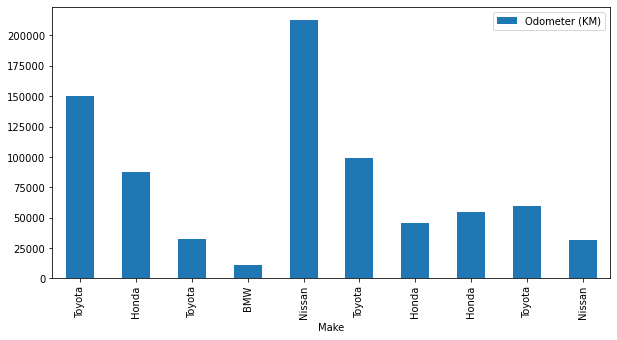

In [44]:
df.plot(x="Make", y="Odometer (KM)", kind="bar", figsize=(10,5));

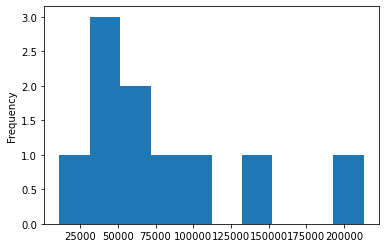

In [45]:
df["Odometer (KM)"].plot.hist();

In [2]:
heart_disease_df = pd.read_csv("heart-disease.csv")
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
over_50_df = heart_disease_df[heart_disease_df["age"] > 50]
over_50_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


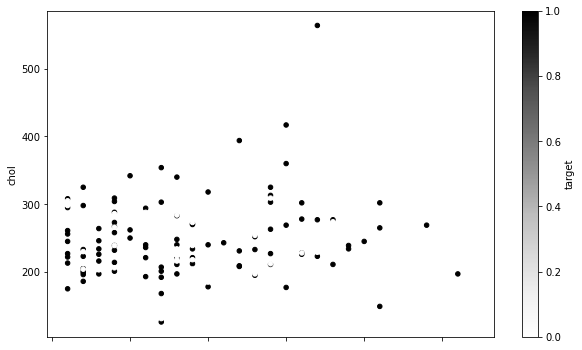

In [7]:
# plotting using pyplot method (.plot())

over_50_df.plot(kind="scatter",
               x="age",
               y="chol",
               c="target",
               figsize=(10,6));

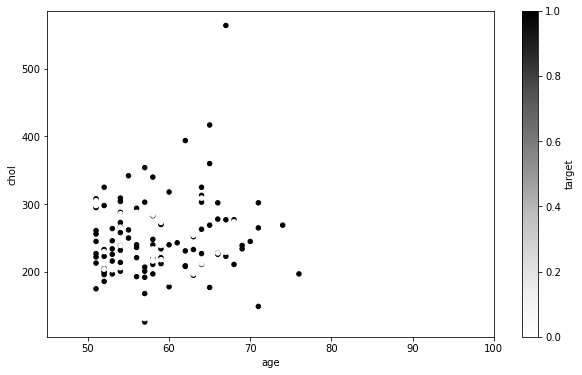

In [11]:
# plotting using object oriented method and plyplot method

fig, ax = plt.subplots(figsize=(10,6))
over_50_df.plot(kind="scatter",
               x="age",
               y="chol",
               c="target",
               ax=ax);

ax.set_xlim(45,100);

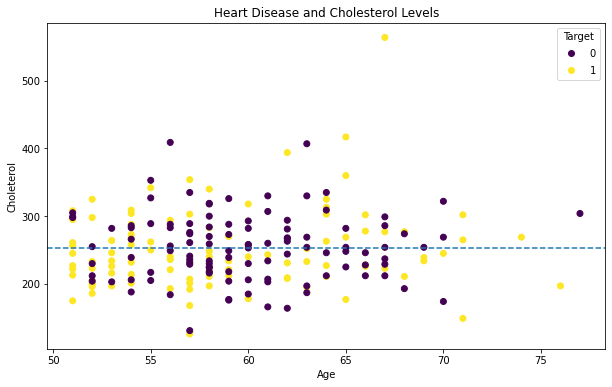

In [19]:
# plotting using object oriented method only

# 1. create figure
fig, ax = plt.subplots(figsize=(10,6))

# 2. plot data
scatter = ax.scatter(x=over_50_df["age"],
           y=over_50_df["chol"],
           c=over_50_df["target"])

# 3. Customize
ax.set(title="Heart Disease and Cholesterol Levels",
        xlabel="Age",
        ylabel="Choleterol");

ax.legend(*scatter.legend_elements(), title="Target");

ax.axhline(over_50_df["chol"].mean(),
          linestyle="--");

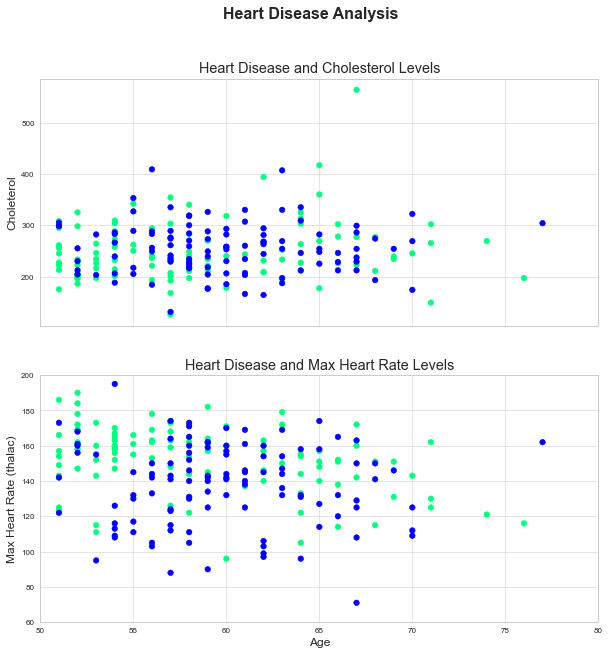

In [39]:
# sublots of thalach and cholesterol

plt.style.use("seaborn-whitegrid")

fig, ((ax1, ax2)) = plt.subplots(figsize=(10,10),
                                nrows=2,
                                ncols=1,
                                sharex=True)

chol_scatter = ax1.scatter(x=over_50_df["age"],
                         y=over_50_df["chol"],
                         c= over_50_df["target"],
                          cmap="winter") # change color of data

heart_rate_scatter = ax2.scatter(x=over_50_df["age"],
                         y=over_50_df["thalach"],
                         c= over_50_df["target"],
                         cmap="winter");


ax1.set(title="Heart Disease and Cholesterol Levels", 
        ylabel="Choleterol");

ax1.set_xlim(50, 80)


ax2.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate (thalac)");

ax2.set_xlim(50, 80)
ax2.set_ylim(60, 200)

fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");



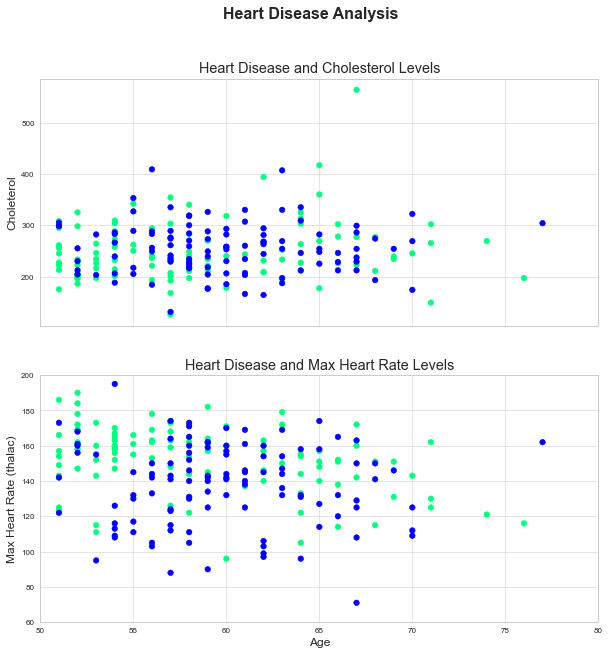

In [40]:
fig

In [41]:
fig.savefig("Heart Disease Analysis Plot")